# Project 2: Ames Housing Data and Kaggle Challenge

Contents:

- tbd

## Part 0: Python Imports

In [359]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

## Part 1: Data Imports & Cleaning

In [430]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
#sample_data = pd.read_csv('datasets/sample_sub_reg.csv')

train_data.shape

(2051, 81)

In [361]:
test_data.shape # one less column (dependent var) and about 30% of total dataset

(878, 80)

In [362]:
test_data = test_data.merge(sample_data, how = 'left', left_on = 'Id', right_on = 'Id')
test_data.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,181479.1217
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,181479.1217
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,181479.1217
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,181479.1217
877,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,3,2007,WD,181479.1217


In [363]:
# checking to make sure that test and train data have the same columns - empty list means only last col. (outcome var) is missing in test_data
[train_data.columns[i] for i in range(len(train_data.columns)-1) if not train_data.columns[i] == test_data.columns[i]]

[]

In [431]:
train_data.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

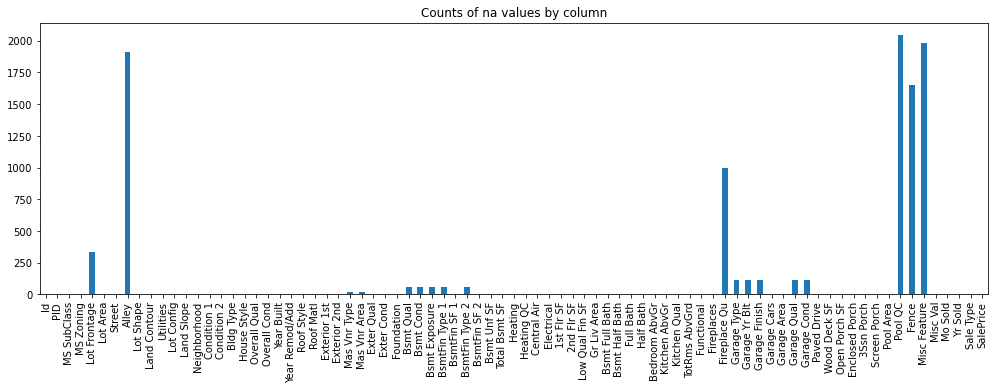

In [432]:
plt.figure(figsize = (17,5))
train_data.isna().sum().plot(kind = 'bar')
plt.title('Counts of na values by column');

In [433]:
# removing columns with at least 50% missing values (there are plenty features with complete info to choose from)
train_data.dropna(axis = 1, thresh = 0.5*len(train_data), inplace = True)
train_data.shape

(2051, 77)

In [434]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

## Part 2: EDA & Visualizations

In [424]:
garage_cols = [col for col in train_data.columns if "Garage" in col]
train_data[train_data['Garage Qual'].isna()][garage_cols].tail()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Garage Qual x Cond
1991,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2010,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2027,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2039,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2042,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [425]:
bsmt_cols = [col for col in train_data.columns if "Bsmt" in col]
train_data[train_data['Bsmt Qual'].isna()][bsmt_cols].tail()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual x Cond
1859,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
1875,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
1889,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
1933,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2010,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN


In [368]:
train_data.groupby(['Neighborhood'])['SalePrice'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
MeadowV,24.0,100231.250000,21955.012365,73000.0,84875.00,92450.0,117250.00,151400.0
IDOTRR,69.0,101103.188406,37891.222668,13100.0,72000.00,102000.0,126000.00,202500.0
BrDale,19.0,103371.052632,11262.318142,85400.0,93750.00,105500.0,111875.00,122500.0
OldTown,163.0,125276.300613,47882.265595,12789.0,104750.00,120000.0,140375.00,475000.0
BrkSide,76.0,127022.697368,34825.975741,39300.0,109375.00,128000.0,139975.00,223500.0
Edwards,143.0,130493.468531,51123.818503,35000.0,101000.00,125000.0,142500.00,415000.0
SWISU,32.0,134758.875000,33074.560117,60000.0,111125.00,136200.0,157608.50,200000.0
Landmrk,1.0,137000.000000,NaN,137000.0,137000.00,137000.0,137000.00,137000.0
Sawyer,111.0,137181.909910,24163.036900,62383.0,124550.00,135000.0,149950.00,219000.0


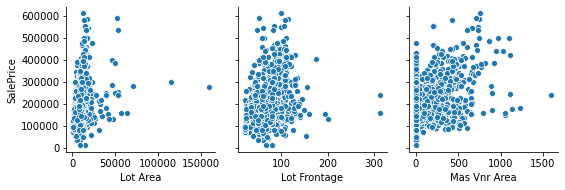

In [369]:
sns.pairplot(data = train_data, x_vars = ['Lot Area', 'Lot Frontage', 'Mas Vnr Area' ], y_vars = ['SalePrice']);

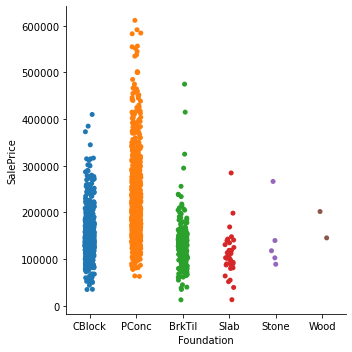

In [377]:
sns.catplot(data = train_data, x = 'Foundation', y = 'SalePrice');

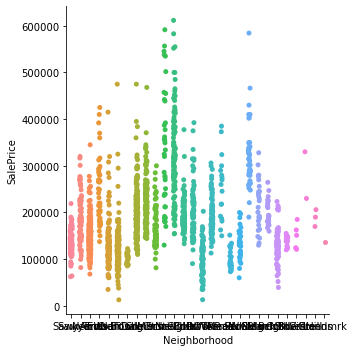

In [379]:
sns.catplot(data = train_data, x = 'Neighborhood', y = 'SalePrice');

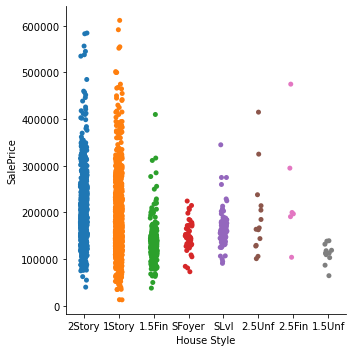

In [380]:
sns.catplot(data = train_data, x = 'House Style', y = 'SalePrice');

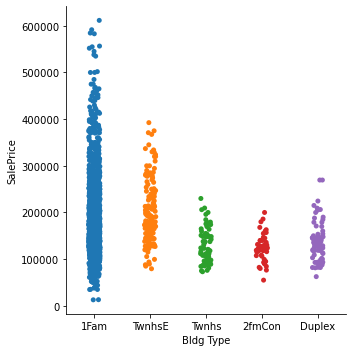

In [382]:
sns.catplot(data = train_data, x = 'Bldg Type', y = 'SalePrice');

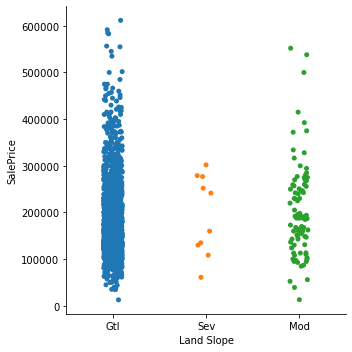

In [383]:
sns.catplot(data = train_data, x = 'Land Slope', y = 'SalePrice');

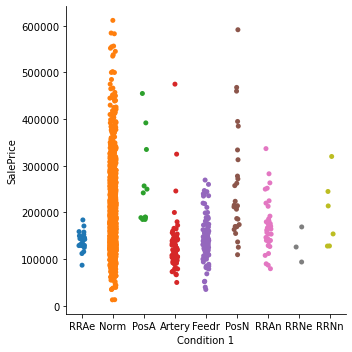

In [389]:
sns.catplot(data = train_data, x = 'Condition 1', y = 'SalePrice');

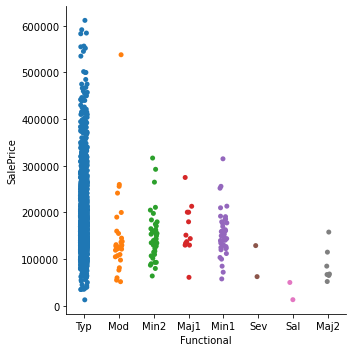

In [390]:
sns.catplot(data = train_data, x = 'Functional', y = 'SalePrice');

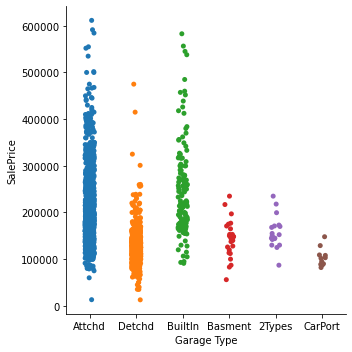

In [391]:
sns.catplot(data = train_data, x = 'Garage Type', y = 'SalePrice');

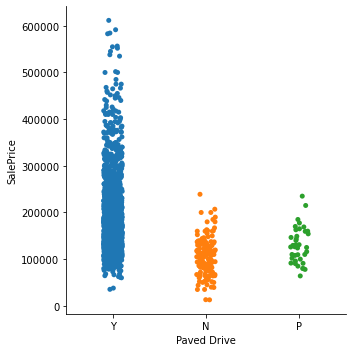

In [392]:
sns.catplot(data = train_data, x = 'Paved Drive', y = 'SalePrice');

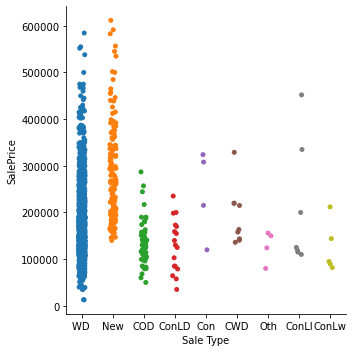

In [393]:
sns.catplot(data = train_data, x = 'Sale Type', y = 'SalePrice');

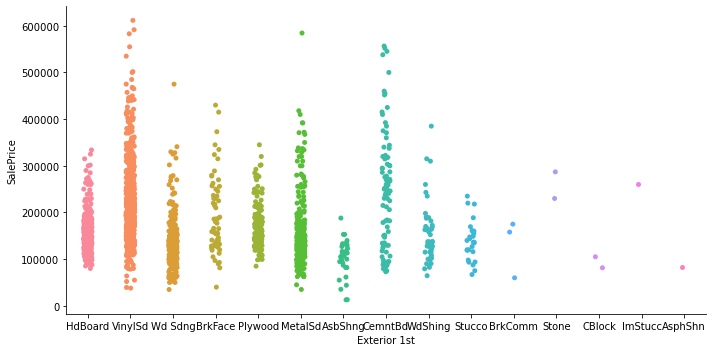

In [397]:
sns.catplot(data = train_data, x = 'Exterior 1st', y = 'SalePrice', aspect = 2);

'MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Condition 1',
 'Condition 2',
 'Roof Style',
 'Roof Matl',
 'Mas Vnr Type',
 'Foundation',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Fireplace Qu',
 'Garage Finish']

## Part 3: Feature Engineering

### Performing all cleaning and feature engineering steps on train data

In [435]:
# from Full and Half Bath, I want to create one total # of bathroooms:
train_data['Bathrooms'] = train_data['Full Bath'] + 0.5 * train_data['Half Bath']
train_data[['Full Bath', 'Half Bath', 'Bathrooms']].head()

,Full Bath,Half Bath,Bathrooms
0,2,1,2.5
1,2,1,2.5
2,1,0,1.0
3,2,1,2.5
4,2,0,2.0


In [436]:
# introducing a binary variable for Pool:
train_data['Pool'] = train_data['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
train_data[train_data['Pool Area']>0][['Pool', 'Pool Area']].head()

,Pool,Pool Area
52,1,519
657,1,576
761,1,800
952,1,228
960,1,480


In [437]:
# introducing age of property. Since the data covers 2006-2010, I am using 2008 as the mid-point:
train_data['Age'] = 2008 - train_data['Year Built']

In [325]:
# listing all remaining object-type variables
[c for c in train_data.columns if train_data[c].dtype == 'O']

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type']

In [438]:
# creating dummy vars for select non-numerical columns which I want to use in the model
train_data = pd.get_dummies(train_data, drop_first=False, columns = 
[
 'Bldg Type',
 #'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 #'Bsmt Qual',
 #'Bsmt Cond',
 #'Bsmt Exposure',
 #'BsmtFin Type 1',
 #'BsmtFin Type 2',
 'Central Air',
 'Electrical',
 'Functional',
 'Paved Drive'])

In [439]:
train_data['Condition 1_Norm'] = train_data['Condition 1'].apply(lambda x: 1 if x == 'Norm' else 0)

In [440]:
train_data.drop(columns = ['Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 
                           'Functional_Maj1', 'Functional_Sev', 'Functional_Sal'], inplace = True)

In [441]:
train_data.drop(columns = ['Electrical_FuseF', 'Electrical_FuseP', 'Electrical_FuseA', 'Electrical_Mix'], inplace = True)

In [405]:
train_data.drop(columns = ['Foundation_Slab', 'Foundation_Wood', 'Foundation_Stone', 'Foundation_BrkTil', 'Foundation_CBlock'], inplace = True)

In [332]:
#ext = ['AsbShng', 'AsphShn' 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard','ImStucc','MetalSd','Other', 'Plywood','PreCast', 'Stone', 'Stucco', 'Wd Sdng', 'WdShing']
#ext_2nd = ['Exterior_2nd_'+mat for mat in ext]
#train_data.drop(columns = ext_2nd, inplace = True)

KeyError: "['Exterior_2nd_AsbShng' 'Exterior_2nd_AsphShnBrkComm'\n 'Exterior_2nd_BrkFace' 'Exterior_2nd_CBlock' 'Exterior_2nd_CemntBd'\n 'Exterior_2nd_HdBoard' 'Exterior_2nd_ImStucc' 'Exterior_2nd_MetalSd'\n 'Exterior_2nd_Other' 'Exterior_2nd_Plywood' 'Exterior_2nd_PreCast'\n 'Exterior_2nd_Stone' 'Exterior_2nd_Stucco' 'Exterior_2nd_Wd Sdng'\n 'Exterior_2nd_WdShing'] not found in axis"

In [ ]:
# for Bldg Type keep only 1Fam 
# for Roof Style keep only Hip
# for Exterior 1 and 2 keep only VinylSd
# for Foundation keep only PConc - done 
# for Electrical keep only SBrkr - done
# for functional keep only Typ - done
# For Paved Drive keep only Y

In [442]:
# defining dictionaries for mapping of ordinal variables
five_scale_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
six_scale_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

In [443]:
# mapping all ordinal variables to their numeric values
train_data['Heating QC'] = train_data['Heating QC'].map(five_scale_map) #- doesn't seem to be very useful in the model
train_data['Kitchen Qual'] = train_data['Kitchen Qual'].map(five_scale_map)
train_data['Exter Qual'] = train_data['Exter Qual'].map(five_scale_map)
train_data['Exter Cond'] = train_data['Exter Cond'].map(five_scale_map)
train_data['Exter Qual x Cond'] = train_data['Exter Qual']*train_data['Exter Cond']

train_data['Garage Qual'] = train_data['Garage Qual'].map(six_scale_map)
train_data['Garage Cond'] = train_data['Garage Cond'].map(six_scale_map)
train_data['Garage Qual x Cond'] = train_data['Garage Qual']*train_data['Garage Cond']
train_data['Garage Qual x Cond'].fillna(0, inplace = True)

train_data['Bsmt Qual'] = train_data['Bsmt Qual'].map(six_scale_map)
train_data['Bsmt Cond'] = train_data['Bsmt Cond'].map(six_scale_map)
train_data['Bsmt Qual x Cond'] = train_data['Bsmt Qual']*train_data['Bsmt Cond']
train_data['Bsmt Qual x Cond'].fillna(0, inplace = True)

In [444]:
train_data['Kitchen Qual'].head()

0    3
1    3
2    3
3    2
4    2
Name: Kitchen Qual, dtype: int64

In [445]:
train_data['Overall Qual x Cond'] = train_data['Overall Qual']*train_data['Overall Cond']

In [446]:
train_data['Garage Cars'].isna().sum()

1

In [447]:
train_data['Garage Cars'].fillna(0, inplace=True)

In [448]:
train_data['Inflation Factor'] = train_data['Yr Sold']-train_data['Yr Sold'].min()

# this is the # of years between the oldest record and each record - theoretically, the coefficient will serve as inflation rate

In [449]:
train_data['LA x Bed x Bath'] = train_data['Gr Liv Area'] * train_data['Bedroom AbvGr'] * train_data['Bathrooms']

In [450]:
# grouping neighborhoods based on their general appeal as per average price

def good_nhood(neighborhood):
    if train_data[train_data['Neighborhood']==neighborhood]['SalePrice'].mean() > train_data['SalePrice'].quantile(0.75):
        return 3
    elif train_data[train_data['Neighborhood']==neighborhood]['SalePrice'].mean() > train_data['SalePrice'].quantile(0.5):
        return 2
    elif train_data[train_data['Neighborhood']==neighborhood]['SalePrice'].mean() > train_data['SalePrice'].quantile(0.25):
        return 1
    else:
        return 0

In [451]:
train_data['Good Nhood'] = train_data['Neighborhood'].apply(good_nhood)

## Part X: Performing all cleaning and feature engineering steps on "test data"

** X variables used in model and whether they were "raw" or modified:
- `Gr Liv Area`- only scaled
- `Bedroom AbvGr` - only scaled
- `Bathrooms` - engineered (X.1)
- `Pool`- engineered (X.2)
- `Age` - engineered (X.3)
- `Kitchen Qual` - engineered (X.4)
- `Exter Qual x Cond` - engineered (X.4)
- `Bldg Type_1Fam` - dummy (X.5)
- `Garage Cars` - fillna() (X.6)
- `Overall Qual x Cond` - (X.7)
- `Inflation Factor` - (X.8)
- `Functional Typ` - (X.5)
- `Good Nhood` - (X.9)

### X.1

In [464]:
# from Full and Half Bath, I want to create one total # of bathroooms:
test_data['Bathrooms'] = test_data['Full Bath'] + 0.5 * test_data['Half Bath']
test_data[['Full Bath', 'Half Bath', 'Bathrooms']].head()

,Full Bath,Half Bath,Bathrooms
0,2,0,2.0
1,2,0,2.0
2,2,1,2.5
3,1,0,1.0
4,1,1,1.5


### X.2

In [465]:
# introducing a binary variable for Pool:
test_data['Pool'] = test_data['Pool Area'].apply(lambda x: 1 if x > 0 else 0)

### X.3

In [466]:
# introducing age of property. Since the data covers 2006-2010, I am using 2008 as the mid-point:
test_data['Age'] = 2008 - test_data['Year Built']

### X.4

In [457]:
test_data['Heating QC'] = test_data['Heating QC'].map(five_scale_map) #- doesn't seem to be very useful in the model
test_data['Kitchen Qual'] = test_data['Kitchen Qual'].map(five_scale_map)
test_data['Exter Qual'] = test_data['Exter Qual'].map(five_scale_map)
test_data['Exter Cond'] = test_data['Exter Cond'].map(five_scale_map)
test_data['Exter Qual x Cond'] = test_data['Exter Qual']*test_data['Exter Cond']

test_data['Garage Qual'] = test_data['Garage Qual'].map(six_scale_map)
test_data['Garage Cond'] = test_data['Garage Cond'].map(six_scale_map)
test_data['Garage Qual x Cond'] = test_data['Garage Qual']*test_data['Garage Cond']
test_data['Garage Qual x Cond'].fillna(0, inplace = True)

test_data['Bsmt Qual'] = test_data['Bsmt Qual'].map(six_scale_map)
test_data['Bsmt Cond'] = test_data['Bsmt Cond'].map(six_scale_map)
test_data['Bsmt Qual x Cond'] = test_data['Bsmt Qual']*test_data['Bsmt Cond']
test_data['Bsmt Qual x Cond'].fillna(0, inplace = True)

### X.5

In [458]:
test_data = pd.get_dummies(test_data, drop_first=False, columns = ['Bldg Type'])

In [459]:
test_data = pd.get_dummies(test_data, drop_first=False, columns = ['Functional'])

In [470]:
test_data = pd.get_dummies(test_data, drop_first=False, columns = ['Foundation'])

In [469]:
test_data['Condition 1_Norm'] = test_data['Condition 1'].apply(lambda x: 1 if x == 'Norm' else 0)

### X.6

In [460]:
test_data['Garage Cars'].isna().sum() # no filling necessary

0

### X.7

In [461]:
test_data['Overall Qual x Cond'] = test_data['Overall Qual']*test_data['Overall Cond']

### X.8

In [462]:
test_data['Inflation Factor'] = test_data['Yr Sold']-train_data['Yr Sold'].min()

# this is the # of years between the oldest record IN TRAINING DATA and each record in test data - theoretically, the coefficient will serve as inflation rate

### X.9

In [467]:
test_data['Good Nhood'] = test_data['Neighborhood'].apply(good_nhood)

## Part 4: Baseline Model

_I first create a baseline model using only square footage as a dependent variable_

In [180]:
# creating independent variables (X) array and :
X_base = train_data[['Gr Liv Area']]
y_base = train_data['SalePrice']

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base)

lr_base = LinearRegression()
lr_base.fit(X_train_base,y_train_base)

lr_base.score(X_train_base,y_train_base)

0.48238959506067003

In [179]:
lr_base.score(X_test_base, y_test_base) 

0.4973812186305321

In [173]:
cross_val_score(lr_base, X_base, y_base).mean()

0.4843217497876555

## Part 5: Model Iterations

_Looking to enhance the model by adding some of the X variables which were available in original data or engineered in previous sections_

#### 5.1: Model Iteration #1

In [188]:
X_1 = ['Gr Liv Area', 'Bedroom AbvGr', 'Bathrooms', 'Pool', 'Age']
# adds minimally to R2: Pool, 'TotRms AbvGrd'
X_one = train_data[X_1]
y = train_data['SalePrice']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_one, y)

mlr_1 = LinearRegression()
mlr_1.fit(X_train_1, y_train_1)

print(f"R2 on training data = {mlr_1.score(X_train_1, y_train_1).round(4)}")
print(f"R2 on test data = {mlr_1.score(X_test_1, y_test_1).round(4)}")
print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_1, X_one, y).mean().round(4)} (std of {cross_val_score(mlr_1, X_one, y).std().round(4)})")

R2 on training data = 0.6702
R2 on test data = 0.7404
Average R2 in 5-fold cross-validation = 0.6827 (std of 0.0508)


#### 5.2: Model Iteration #2

More dependent variables to boost R2

In [269]:
X_2 = ['Gr Liv Area', 'Bedroom AbvGr', 'Bathrooms', 'Pool', 'Age', 'Kitchen Qual', 'Exter Qual x Cond', 
       'Bldg Type_1Fam', 'Garage Cars', 'Functional_Typ','Overall Qual x Cond', 'Inflation Factor']
X_two = train_data[X_2]
y = train_data['SalePrice']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_two_sc, y)

mlr_2 = LinearRegression()
mlr_2.fit(X_train_2, y_train_2)

print(f"R2 on training data = {mlr_2.score(X_train_2, y_train_2).round(4)}")
print(f"R2 on test data = {mlr_2.score(X_test_2, y_test_2).round(4)}")
print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_2, X_two_sc, y).mean().round(4)} (std of {cross_val_score(mlr_2, X_two, y).std().round(4)})")

R2 on training data = 0.7967
R2 on test data = 0.7652
Average R2 in 5-fold cross-validation = 0.7848 (std of 0.039)


#### 5.3: Model Iteration #3

Scaling variables to give _equal power_ to each

In [455]:
X_2 = ['Gr Liv Area', 'Bedroom AbvGr', 'Bathrooms', 'Pool', 'Age', 'Kitchen Qual', 'Exter Qual x Cond', 
       'Bldg Type_1Fam', 'Garage Cars', 'Functional_Typ', 'Overall Qual x Cond', 'Inflation Factor', 'Good Nhood', 
       'Lot Area', 'Foundation_PConc', 'Condition 1_Norm', 'Garage Qual x Cond', 'Bsmt Qual x Cond'] #'Mas Vnr Area has NaNs - need to see how to handle
X_two = train_data[X_2]
y = train_data['SalePrice']

scaler = StandardScaler()
X_two_sc = scaler.fit_transform(X_two)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_two_sc, y)

X_train_2_sc = scaler.fit_transform(X_train_2)
X_test_2_sc = scaler.transform(X_test_2)

mlr_2_sc = LinearRegression()
mlr_2_sc.fit(X_train_2_sc, y_train_2)

print(f"R2 on training data = {mlr_2_sc.score(X_train_2_sc, y_train_2).round(4)}")
print(f"R2 on test data = {mlr_2_sc.score(X_test_2_sc, y_test_2).round(4)}")
print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_2_sc, X_two_sc, y).mean().round(4)} (std of {cross_val_score(mlr_2_sc, X_two_sc, y).std().round(4)})")

R2 on training data = 0.8277
R2 on test data = 0.7538
Average R2 in 5-fold cross-validation = 0.805 (std of 0.0359)


#### 5.4: Model Iteration #4

Experimenting with polynomials - **NOT SUCCESSFUL - USE FOR ANOTHER MODEL**

In [285]:
X_3 = ['LA x Bed x Bath', 'Pool', 'Age', 'Kitchen Qual', 'Exter Qual x Cond', 
       'Bldg Type_1Fam', 'Garage Cars', 'Functional_Typ', 'Overall Qual x Cond', 'Inflation Factor']
X_three = train_data[X_3]
y = train_data['SalePrice']

scaler = StandardScaler()
X_three_sc = scaler.fit_transform(X_three)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_three_sc, y)

X_train_3_sc = scaler.fit_transform(X_train_3)
X_test_3_sc = scaler.transform(X_test_3)

mlr_3_sc = LinearRegression()
mlr_3_sc.fit(X_train_3_sc, y_train_3)

print(f"R2 on training data = {mlr_3_sc.score(X_train_3_sc, y_train_3).round(4)}")
print(f"R2 on test data = {mlr_3_sc.score(X_test_3_sc, y_test_3).round(4)}")
print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_3_sc, X_three_sc, y).mean().round(4)} (std of {cross_val_score(mlr_3_sc, X_three_sc, y).std().round(4)})")

R2 on training data = 0.7448
R2 on test data = 0.6991
Average R2 in 5-fold cross-validation = 0.7322 (std of 0.022)


### TEMPLATE ###

In [188]:
X_i = []
# adds minimally to R2: Pool, 'TotRms AbvGrd'
X_i-word = train_data[X_i]
y = train_data['SalePrice']

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i-word, y)

mlr_i = LinearRegression()
mlr_i.fit(X_train_i, y_train_i)

print(f"R2 on training data = {mlr_i.score(X_train_i, y_train_i).round(4)}")
print(f"R2 on test data = {mlr_i.score(X_test_i, y_test_i).round(4)}")
print(f"Average R2 in 5-fold cross-validation = {cross_val_score(mlr_i, X_i-word, y).mean().round(4)} (std of {cross_val_score(mlr_i, X_i-word, y).std().round(4)})")

R2 on training data = 0.6702
R2 on test data = 0.7404
Average R2 in 5-fold cross-validation = 0.6827 (std of 0.0508)


## Part 6: Predictions

###  6.1 Creating scaled X variables from "test data"

In [471]:
X_two_test = test_data[X_2]

scaler = StandardScaler()
X_two_test_sc = scaler.fit_transform(X_two_test)

###  6.2 Applying model to scaled X variables from "test data"

In [472]:
mlr_2_sc_preds = mlr_2_sc.predict(X_two_test_sc)
mlr_2_sc_preds[:15]

array([124511.60261018, 152406.93234358, 225917.90074011, 123428.70948533,
       160780.28001503,  81769.06233125, 108545.75940849, 186608.45689912,
       230269.23247215, 163897.31936688, 181159.03984126, 129118.2815993 ,
       165644.57547045, 242825.79373872, 181399.33359694])

## Part 7: Submission File

In [473]:
test_data['SalePrice'] = mlr_2_sc_preds

In [474]:
test_data[['Id', 'SalePrice']].head()

,Id,SalePrice
0,2658,124511.602610
1,2718,152406.932344
2,2414,225917.900740
3,1989,123428.709485
4,625,160780.280015


In [475]:
submission = test_data[['Id', 'SalePrice']].copy()

In [476]:
submission.head()

,Id,SalePrice
0,2658,124511.602610
1,2718,152406.932344
2,2414,225917.900740
3,1989,123428.709485
4,625,160780.280015


In [477]:
submission.to_csv('./datasets/submission_3.csv', index = False)